# Input module examples

To do:

- incorporate pint and show how to do units stuff

In [1]:
%matplotlib inline

from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError
import matplotlib.pyplot as plt
plt.style.use('bmh') 

import expectexception

<IPython.core.display.Javascript object>

In [2]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")
TEST_DATA_DIR = join("..", "tests", "test_data")

## Read files

In [3]:
mdata = MAGICCData(
    join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"),
    scenario="Historical",
)
mdata.head()

time                                                                                                         1765-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1766-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1767-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1768-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5MAF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5LAM  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   

time                                                                                                         1769-01-01  \
model       scenario   region       variable                                   unit      climate_model todo               
unspecified Historical World|R5OECD Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.003   
                       World|R5REF  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET        0.000   
                       World|R5ASIA Emissions|CO2|MAGICC Fos

In [4]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE \r\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37 \r\n'
           ' \r\n'
           ' \r\n'
           'DATA:  Historical fossil&industrial CO2 (CO2I) Emissions '
           '(HISTRCP_CO2I_EMIS) \r\n'
           'SOURCE:  RCP data as presented on '

## Filtering

As we're built on top of Pyam's IamDataFrame, we get access to all of its filtering capabilities too.

In [5]:
mdata.filter(region="*R5ASIA").head()

,,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,todo,,,,,,,,,,,,,,,,,,,,,
unspecified,Historical,World|R5ASIA,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,unspecified,SET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.76053,1.648214,1.712315,1.768203,1.849029,1.922234,2.142218,2.417585,2.608225,2.795696


### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [6]:
# NBVAL_IGNORE_OUTPUT
mdata.append(
    join(MAGICC6_DIR, "RCP45.SCEN"),
    scenario="RCP45",
    model="MiniCAM",
)
mdata.head()

time                                                                                               1765-01-01 00:00:00  \
model   scenario region variable                                   unit        climate_model todo                        
MiniCAM RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN   
                        Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN   
                        Emissions|BC                               Mt BC / yr  unspecified   SET                   NaN   
                        Emissions|CH4                              Mt CH4 / yr unspecified   SET                   NaN   
                        Emissions|CO                               Mt CO / yr  unspecified   SET                   NaN   

time                                                                                               1766-01-01 00:00:00  \
model   scenario region variable                                   unit        climate_model todo                        
MiniCAM RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN   
                        Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN   
                        Emissions|BC                               Mt BC / yr  unspecified   SET                   NaN   
                        Emissions|CH4                              Mt CH4 / yr unspecified   SET                   NaN   
                        Emissions|CO                               Mt CO / yr  unspecified   SET                   NaN   

time                                                                                               1767-01-01 00:00:00  \
model   scenario region variable                                   unit        climate_model todo                        
MiniCAM RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN   
                        Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN   
                        Emissions|BC                               Mt BC / yr  unspecified   SET                   NaN   
                        Emissions|CH4                              Mt CH4 / yr unspecified   SET                   NaN   
                        Emissions|CO                               Mt CO / yr  unspecified   SET                   NaN   

time                                                                                               1768-01-01 00:00:00  \
model   scenario region variable                                   unit        climate_model todo                        
MiniCAM RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN   
                        Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN   
                        Emissions|BC                               Mt BC / yr  unspecified   SET                   NaN   
                        Emissions|CH4                              Mt CH4 / yr unspecified   SET                   NaN   
                        Emissions|CO                               Mt CO / yr  unspecified   SET                   NaN   

time                                                                                               1769-01-01 00:00:00  \
model   scenario region variable                                   unit        climate_model todo                        
MiniCAM RCP45    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                   NaN   
                        Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                   NaN   
                        Emissions|BC                               Mt BC / yr  unspecified  

In [7]:
# NBVAL_IGNORE_OUTPUT
mdata.filter(
    variable="*BC",
    region="*ASIA"
).head()

,,,,,,time,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2010-01-01 00:00:00,2020-01-01 00:00:00,...,2250-01-01 00:00:00,2260-01-01 00:00:00,2270-01-01 00:00:00,2280-01-01 00:00:00,2290-01-01 00:00:00,2300-01-01 00:00:00,2350-01-01 00:00:00,2400-01-01 00:00:00,2450-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,todo,,,,,,,,,,,,,,,,,,,,,
MiniCAM,RCP45,World|R5ASIA,Emissions|BC,Mt BC / yr,unspecified,SET,3.0468,3.109,3.1818,3.2546,3.3274,3.4002,3.4057,3.4112,3.4279,3.4835,...,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791


### Reading RCP data files

We can also read the RCP data files provided at http://www.pik-potsdam.de/~mmalte/rcps/. These are also tricky as the underlying data format is unique.

In [8]:
# NBVAL_IGNORE_OUTPUT
mdata.append(
    join(TEST_DATA_DIR, "RCP3PD_EMISSIONS.DAT"),
    model="IMAGE",
    scenario="RCP26"
)
mdata.head()

time                                                                                             1765-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                 0.000   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                 0.003   
                      Emissions|BC                               Mt BC / yr  unspecified   SET                 0.000   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET                 0.000   
                      Emissions|CO                               Mt CO / yr  unspecified   SET                 0.000   

time                                                                                             1766-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET              0.005338   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET              0.003000   
                      Emissions|BC                               Mt BC / yr  unspecified   SET              0.106998   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              1.963262   
                      Emissions|CO                               Mt CO / yr  unspecified   SET              9.050221   

time                                                                                             1767-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET              0.010677   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET              0.003000   
                      Emissions|BC                               Mt BC / yr  unspecified   SET              0.133383   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              2.436448   
                      Emissions|CO                               Mt CO / yr  unspecified   SET             12.960844   

time                                                                                             1768-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET              0.016015   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET              0.003000   
                      Emissions|BC                               Mt BC / yr  unspecified   SET              0.159847   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              2.911105   
                      Emissions|CO                               Mt CO / yr  unspecified   SET             16.876539   

time                                                                                             1769-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE RCP26    World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET              0.021353   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET              0.003000   
                      Emissions|BC                               Mt BC / yr  unspecified   SET              0.186393   
                      Emissions|CH4 

In [9]:
pd.Series(mdata['variable'].unique()).sort_values().reset_index(drop=True)

0                                   Emissions|BC
1                                 Emissions|C2F6
2                                Emissions|C6F14
3                                 Emissions|CCl4
4                                  Emissions|CF4
5                                Emissions|CFC11
6                               Emissions|CFC113
7                               Emissions|CFC114
8                               Emissions|CFC115
9                                Emissions|CFC12
10                               Emissions|CH3Br
11                             Emissions|CH3CCl3
12                               Emissions|CH3Cl
13                                 Emissions|CH4
14                                  Emissions|CO
15                    Emissions|CO2|MAGICC AFOLU
16    Emissions|CO2|MAGICC Fossil and Industrial
17                            Emissions|HCFC141b
18                            Emissions|HCFC142b
19                              Emissions|HCFC22
20                  

In [10]:
# NBVAL_IGNORE_OUTPUT
mdata.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_CONCENTRATIONS.DAT"),
    model="IMAGE",
    scenario="RCP26",
    climate_model="MAGICC6"
)
mdata.head()

time                                                                                              1765-01-01 00:00:00  \
model scenario region variable                                           unit climate_model todo                        
IMAGE RCP26    World  Atmospheric Concentrations|CH4                     ppb  MAGICC6       SET             721.89411   
                      Atmospheric Concentrations|N2O                     ppb  MAGICC6       SET             272.95961   
                      Atmospheric Concentrations|CO2                     ppm  MAGICC6       SET             278.05158   
                      Atmospheric Concentrations|CO2 Equivalent          ppm  MAGICC6       SET             277.01467   
                      Atmospheric Concentrations|CO2 Equivalent|Kyoto... ppm  MAGICC6       SET             277.01467   

time                                                                                              1766-01-01 00:00:00  \
model scenario region variable                                           unit climate_model todo                        
IMAGE RCP26    World  Atmospheric Concentrations|CH4                     ppb  MAGICC6       SET             722.25570   
                      Atmospheric Concentrations|N2O                     ppb  MAGICC6       SET             272.97121   
                      Atmospheric Concentrations|CO2                     ppm  MAGICC6       SET             278.10615   
                      Atmospheric Concentrations|CO2 Equivalent          ppm  MAGICC6       SET             277.83880   
                      Atmospheric Concentrations|CO2 Equivalent|Kyoto... ppm  MAGICC6       SET             277.81457   

time                                                                                              1767-01-01 00:00:00  \
model scenario region variable                                           unit climate_model todo                        
IMAGE RCP26    World  Atmospheric Concentrations|CH4                     ppb  MAGICC6       SET             722.97082   
                      Atmospheric Concentrations|N2O                     ppb  MAGICC6       SET             272.99419   
                      Atmospheric Concentrations|CO2                     ppm  MAGICC6       SET             278.22039   
                      Atmospheric Concentrations|CO2 Equivalent          ppm  MAGICC6       SET             278.69351   
                      Atmospheric Concentrations|CO2 Equivalent|Kyoto... ppm  MAGICC6       SET             278.68732   

time                                                                                              1768-01-01 00:00:00  \
model scenario region variable                                           unit climate_model todo                        
IMAGE RCP26    World  Atmospheric Concentrations|CH4                     ppb  MAGICC6       SET             723.66792   
                      Atmospheric Concentrations|N2O                     ppb  MAGICC6       SET             273.01678   
                      Atmospheric Concentrations|CO2                     ppm  MAGICC6       SET             278.34305   
                      Atmospheric Concentrations|CO2 Equivalent          ppm  MAGICC6       SET             278.74752   
                      Atmospheric Concentrations|CO2 Equivalent|Kyoto... ppm  MAGICC6       SET             278.83598   

time                                                                                              1769-01-01 00:00:00  \
model scenario region variable                                           unit climate_model todo                        
IMAGE RCP26    World  Atmospheric Concentrations|CH4                     ppb  MAGICC6       SET             724.34313   
                      Atmospheric Concentrations|N2O                     ppb  MAGICC6       SET             273.03903   
                      Atmospheric Concentrations|CO2                     ppm  MAGICC6       SET             278.47058   
   

In [11]:
pd.Series(mdata['variable'].unique()).sort_values().reset_index(drop=True)

0                       Atmospheric Concentrations|C2F6
1                      Atmospheric Concentrations|C6F14
2                       Atmospheric Concentrations|CCl4
3                        Atmospheric Concentrations|CF4
4                      Atmospheric Concentrations|CFC11
5                     Atmospheric Concentrations|CFC113
6                     Atmospheric Concentrations|CFC114
7                     Atmospheric Concentrations|CFC115
8                      Atmospheric Concentrations|CFC12
9     Atmospheric Concentrations|CFC12 Equivalent|Mo...
10                     Atmospheric Concentrations|CH3Br
11                   Atmospheric Concentrations|CH3CCl3
12                     Atmospheric Concentrations|CH3Cl
13                       Atmospheric Concentrations|CH4
14                       Atmospheric Concentrations|CO2
15            Atmospheric Concentrations|CO2 Equivalent
16    Atmospheric Concentrations|CO2 Equivalent|Kyot...
17                  Atmospheric Concentrations|H

In [12]:
# NBVAL_IGNORE_OUTPUT
mdata.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_RADFORCING.DAT"),
    model="IMAGE",
    scenario="RCP26",
    climate_model="MAGICC6"
)
mdata.head()

time                                                                                         1765-01-01 00:00:00  \
model scenario region variable                                   unit    climate_model todo                        
IMAGE RCP26    World  Radiative Forcing                          W / m^2 MAGICC6       SET                   0.0   
                      Radiative Forcing|Aerosols|Direct Effect   W / m^2 MAGICC6       SET                   0.0   
                      Radiative Forcing|Aerosols|Indirect Effect W / m^2 MAGICC6       SET                   0.0   
                      Radiative Forcing|Aerosols|MAGICC AFOLU    W / m^2 MAGICC6       SET                   0.0   
                      Radiative Forcing|Anthropogenic            W / m^2 MAGICC6       SET                   0.0   

time                                                                                         1766-01-01 00:00:00  \
model scenario region variable                                   unit    climate_model todo                        
IMAGE RCP26    World  Radiative Forcing                          W / m^2 MAGICC6       SET              0.126027   
                      Radiative Forcing|Aerosols|Direct Effect   W / m^2 MAGICC6       SET              0.000018   
                      Radiative Forcing|Aerosols|Indirect Effect W / m^2 MAGICC6       SET             -0.000801   
                      Radiative Forcing|Aerosols|MAGICC AFOLU    W / m^2 MAGICC6       SET              0.000250   
                      Radiative Forcing|Anthropogenic            W / m^2 MAGICC6       SET              0.016319   

time                                                                                         1767-01-01 00:00:00  \
model scenario region variable                                   unit    climate_model todo                        
IMAGE RCP26    World  Radiative Forcing                          W / m^2 MAGICC6       SET              0.273031   
                      Radiative Forcing|Aerosols|Direct Effect   W / m^2 MAGICC6       SET             -0.000006   
                      Radiative Forcing|Aerosols|Indirect Effect W / m^2 MAGICC6       SET             -0.002381   
                      Radiative Forcing|Aerosols|MAGICC AFOLU    W / m^2 MAGICC6       SET              0.000673   
                      Radiative Forcing|Anthropogenic            W / m^2 MAGICC6       SET              0.033548   

time                                                                                         1768-01-01 00:00:00  \
model scenario region variable                                   unit    climate_model todo                        
IMAGE RCP26    World  Radiative Forcing                          W / m^2 MAGICC6       SET              0.278871   
                      Radiative Forcing|Aerosols|Direct Effect   W / m^2 MAGICC6       SET             -0.000120   
                      Radiative Forcing|Aerosols|Indirect Effect W / m^2 MAGICC6       SET             -0.003915   
                      Radiative Forcing|Aerosols|MAGICC AFOLU    W / m^2 MAGICC6       SET              0.000978   
                      Radiative Forcing|Anthropogenic            W / m^2 MAGICC6       SET              0.035170   

time                                                                                         1769-01-01 00:00:00  \
model scenario region variable                                   unit    climate_model todo                        
IMAGE RCP26    World  Radiative Forcing                          W / m^2 MAGICC6       SET              0.242045   
                      Radiative Forcing|Aerosols|Direct Effect   W / m^2 MAGICC6       SET             -0.000282   
                      Radiative Forcing|Aerosols|Indirect Effect W / m^2 MAGICC6       SET             -0.005404   
                      Radiative Forcing|Aerosols|MAGICC AFOLU    W / m^2 MAGICC6       SET              0.001215   
                      Radiative Forcing|Anthropogeni

In [13]:
pd.Series(mdata['variable'].unique()).sort_values().reset_index(drop=True)

0                        Atmospheric Concentrations|C2F6
1                       Atmospheric Concentrations|C6F14
2                        Atmospheric Concentrations|CCl4
3                         Atmospheric Concentrations|CF4
4                       Atmospheric Concentrations|CFC11
5                      Atmospheric Concentrations|CFC113
6                      Atmospheric Concentrations|CFC114
7                      Atmospheric Concentrations|CFC115
8                       Atmospheric Concentrations|CFC12
9      Atmospheric Concentrations|CFC12 Equivalent|Mo...
10                      Atmospheric Concentrations|CH3Br
11                    Atmospheric Concentrations|CH3CCl3
12                      Atmospheric Concentrations|CH3Cl
13                        Atmospheric Concentrations|CH4
14                        Atmospheric Concentrations|CO2
15             Atmospheric Concentrations|CO2 Equivalent
16     Atmospheric Concentrations|CO2 Equivalent|Kyot...
17                   Atmospheri

### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [14]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):
    
    if file.endswith((".exe")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(
            join(MAGICC6_DIR, file)
        )
    else:   
        all_run_files[file] = MAGICCData(join(MAGICC6_DIR, file))

In [15]:
sorted(all_run_files.keys())

['EDGAR_NOXB_EMIS.IN',
 'EDGAR_NOXI_EMIS.IN',
 'GISS_BCB_OT.IN',
 'GISS_BCB_RF.IN',
 'GISS_BCI_OT.IN',
 'GISS_BCI_RF.IN',
 'GISS_BCSNOW_RF.IN',
 'GISS_LANDUSE_RF.IN',
 'GISS_NOX_RF.IN',
 'GISS_OCB_OT.IN',
 'GISS_OCB_RF.IN',
 'GISS_OCI_OT.IN',
 'GISS_OCI_RF.IN',
 'GISS_OCN_OT.IN',
 'GISS_SOXI_OT.IN',
 'GISS_SOXNB_OT.IN',
 'GISS_SOX_RF.IN',
 'GISS_SS_OT.IN',
 'HISTRCP2009_SOLAR_RF.IN',
 'HISTRCP45SCP45to3PD_SOLAR_RF.IN',
 'HISTRCP45_SOLAR_RF.IN',
 'HISTRCP60_2300_SOLAR_RF.IN',
 'HISTRCP6SCP6to45_SOLAR_RF.IN',
 'HISTRCP6_SOLAR_RF.IN',
 'HISTRCP85_SOLAR_RF.IN',
 'HISTRCP_BCB_EMIS.IN',
 'HISTRCP_BCI_EMIS.IN',
 'HISTRCP_C2F6_CONC.IN',
 'HISTRCP_C2F6_EMIS.IN',
 'HISTRCP_C6F14I_EMIS.IN',
 'HISTRCP_C6F14_CONC.IN',
 'HISTRCP_C6F14_EMIS.IN',
 'HISTRCP_CF4_CONC.IN',
 'HISTRCP_CF4_EMIS.IN',
 'HISTRCP_CH4B_EMIS.IN',
 'HISTRCP_CH4I_EMIS.IN',
 'HISTRCP_CH4_CONC.IN',
 'HISTRCP_CO2B_EMIS.IN',
 'HISTRCP_CO2I_EMIS.IN',
 'HISTRCP_CO2_CONC.IN',
 'HISTRCP_COB_EMIS.IN',
 'HISTRCP_COI_EMIS.IN',
 'HISTRCP_HFC12

In [16]:
all_run_files["SRESB2.SCEN"].head()

time                                                                                                          1990-01-01 00:00:00  \
model       scenario    region    variable                                   unit         climate_model todo                        
unspecified unspecified World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                0.7152   
                                  Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.7321   
                                  Emissions|CH4                              Mt CH4 / yr  unspecified   SET               76.7245   
                                  Emissions|N2O                              Mt N2ON / yr unspecified   SET                1.1778   
                                  Emissions|SOx                              Mt S / yr    unspecified   SET               10.5377   

time                                                                                                          2000-01-01 00:00:00  \
model       scenario    region    variable                                   unit         climate_model todo                        
unspecified unspecified World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                1.0116   
                                  Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.8169   
                                  Emissions|CH4                              Mt CH4 / yr  unspecified   SET               85.1631   
                                  Emissions|N2O                              Mt N2ON / yr unspecified   SET                1.2938   
                                  Emissions|SOx                              Mt S / yr    unspecified   SET               12.7760   

time                                                                                                          2010-01-01 00:00:00  \
model       scenario    region    variable                                   unit         climate_model todo                        
unspecified unspecified World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                1.2639   
                                  Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.6338   
                                  Emissions|CH4                              Mt CH4 / yr  unspecified   SET               94.4740   
                                  Emissions|N2O                              Mt N2ON / yr unspecified   SET                0.6886   
                                  Emissions|SOx                              Mt S / yr    unspecified   SET               14.4000   

time                                                                                                          2020-01-01 00:00:00  \
model       scenario    region    variable                                   unit         climate_model todo                        
unspecified unspecified World|ALM Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr    unspecified   SET                1.4831   
                                  Emissions|CO2|MAGICC AFOLU                 Gt C / yr    unspecified   SET                0.4206   
                                  Emissions|CH4                              Mt CH4 / yr  unspecified   SET              101.6967   
                                  Emissions|N2O                              Mt N2ON / yr unspecified   SET                0.6016   
                                  Emissions|SOx                              Mt S / yr    unspecified   SET               15.2410   

time                                                                                                          2030-01-01 00:00:00  \
model       scenario    region    variable                                   unit         climate_model todo                        
unspec

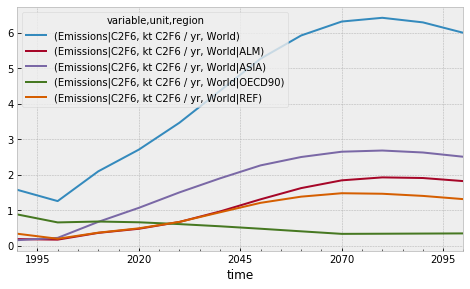

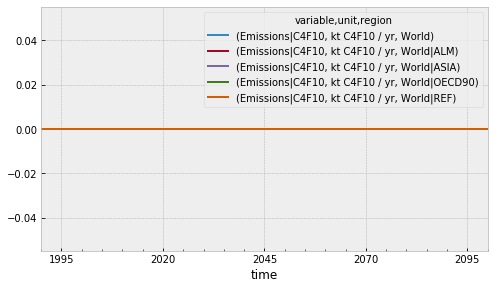

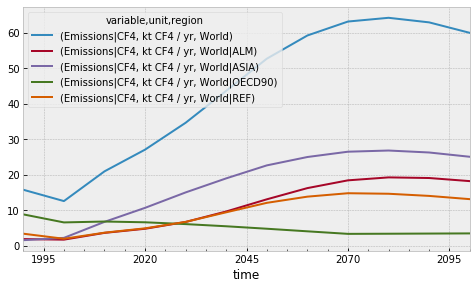

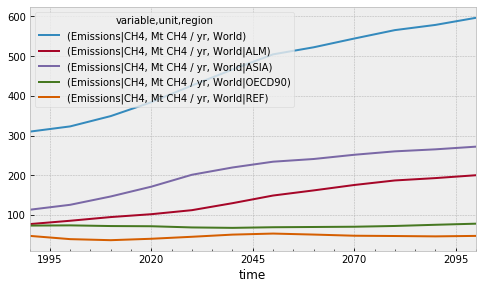

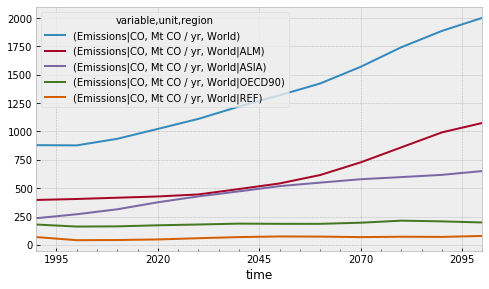

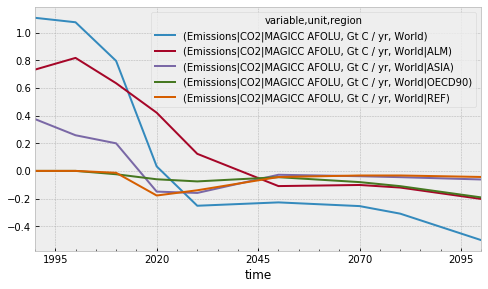

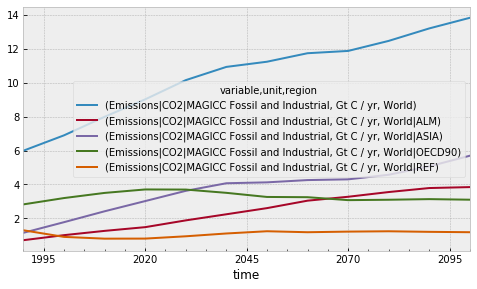

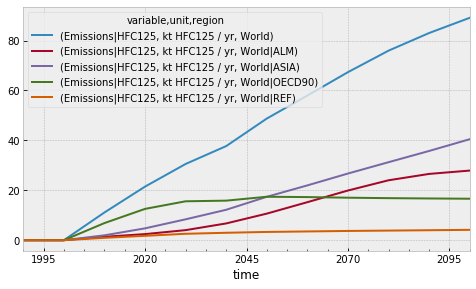

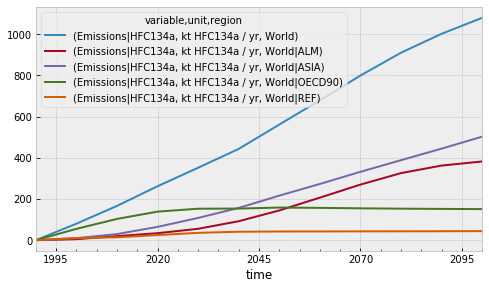

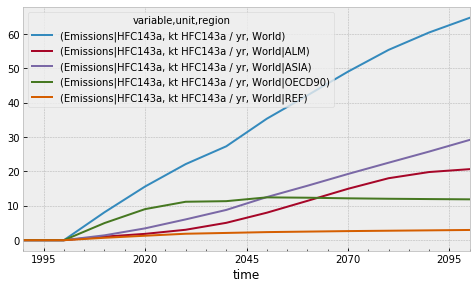

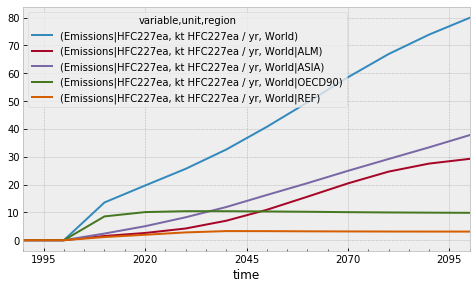

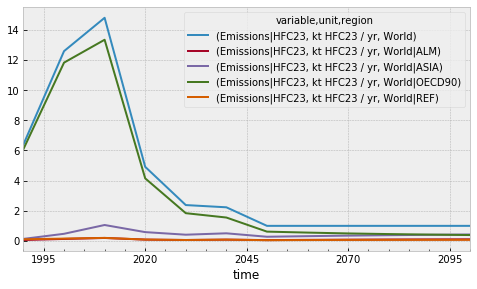

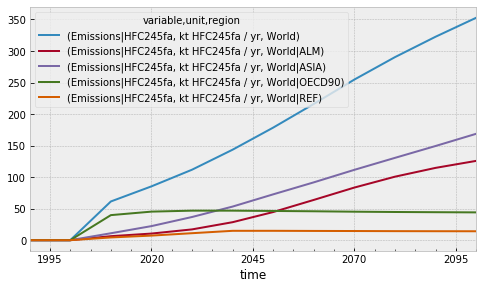

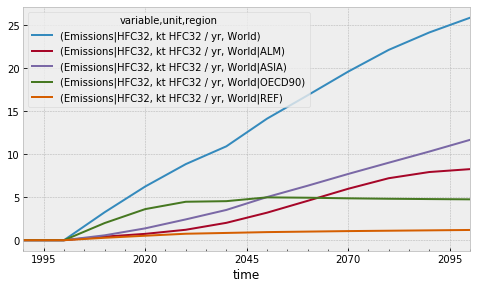

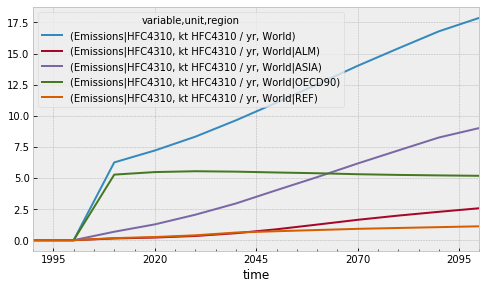

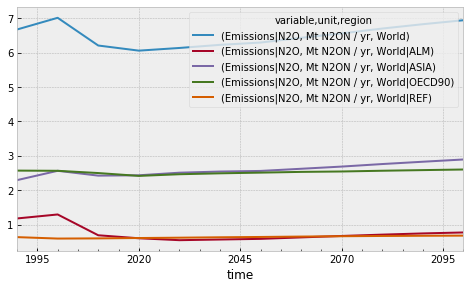

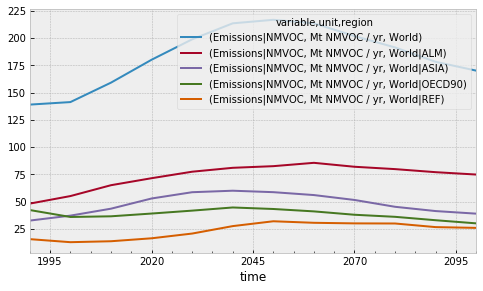

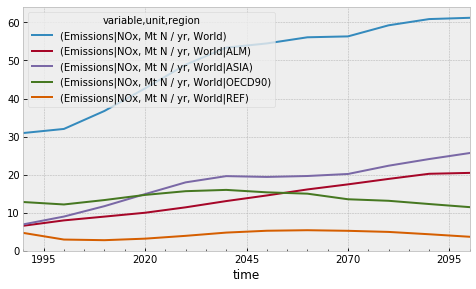

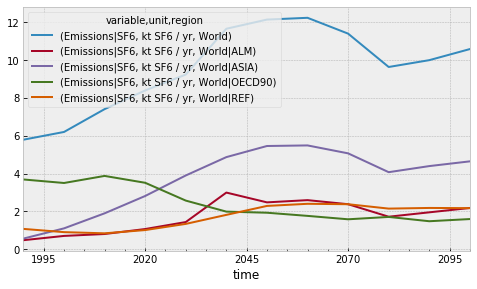

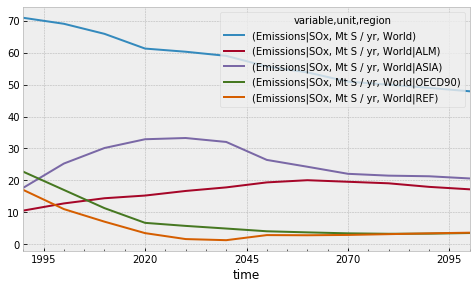

In [17]:
all_run_files["SRESB2.SCEN"].to_iamdataframe().pivot_table(
    index="time", 
    columns=["variable", "unit", "region"], 
    aggfunc="sum"
).groupby(level="variable", axis=1).plot(figsize=(8, 4.5));

## Writing files

Once you have your data in the format as above, writing files is trivial. 

In [18]:
mdata = MAGICCData(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN", magicc_version=7)

mdata = MAGICCData(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.write("SCENEXAMPLE.SCEN", magicc_version=7)

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions, see [the docs](https://pymagicc.readthedocs.io/en/latest/file_conventions.html). Our error messaging will hopefully make this slightly clearer.

In [19]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt", magicc_version=7)

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-19-20ac4c194f29> in <module>
----> 1 mdata.write("histexample.txt", magicc_version=7)

~/code/uom/pymagicc/pymagicc/io.py in write(self, filepath, magicc_version)
   1913             for.
   1914         """
-> 1915         writer = determine_tool(filepath, "writer")(magicc_version=magicc_version)
   1916         writer.write(self, filepath)
   1917 

~/code/uom/pymagicc/pymagicc/io.py in determine_tool(filepath, tool_to_get)
   2047         )
   2048 
-> 2049     raise NoReaderWriterError(error_msg)
   2050 
   2051 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filepath must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
EmisIn: ^.*\_EMIS.*\.IN$
ConcIn: ^.*\_CONC.*\.IN$
OpticalThicknessIn: ^.